In [1]:
import pandas as pd
import numpy as np

In [2]:
ed = pd.read_csv('exam data.csv')

In [3]:
ed

,id,age,Income,student,Class buy\ncomputer
0,1,Youth,High,No,No
1,2,Senior,High,No,No
2,3,Middle,High,Yes,Yes
3,4,Senior,Medium,Yes,Yes
4,5,Middle,Low,Yes,Yes
5,6,Senior,Low,Yes,No


In [4]:
ed.rename(columns={'Class buy\ncomputer':'Class buy computer'}, inplace=True)

In [5]:
ed

,id,age,Income,student,Class buy computer
0,1,Youth,High,No,No
1,2,Senior,High,No,No
2,3,Middle,High,Yes,Yes
3,4,Senior,Medium,Yes,Yes
4,5,Middle,Low,Yes,Yes
5,6,Senior,Low,Yes,No


In [6]:
ed.drop('id',axis='columns',inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
for cl in ed.columns:
    if ed[cl].dtype == np.number:
        continue
    ed[cl] = le.fit_transform(ed[cl])

<ipython-input-9-a4493bb77c27>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if ed[cl].dtype == np.number:


In [10]:
ed

,age,Income,student,Class buy computer
0,2,0,0,0
1,1,0,0,0
2,0,0,1,1
3,1,2,1,1
4,0,1,1,1
5,1,1,1,0


In [11]:
x = ed.drop(['Class buy computer'], axis=1)
y = ed['Class buy computer']

In [12]:
x

,age,Income,student
0,2,0,0
1,1,0,0
2,0,0,1
3,1,2,1
4,0,1,1
5,1,1,1


In [13]:
y

0    0
1    0
2    1
3    1
4    1
5    0
Name: Class buy computer, dtype: int32

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [16]:
dtc.predict([[1,0,0]])

array([0])

In [19]:
dtc.predict([[0,0,1]])

array([1])

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(223.2, 543.6, 'age  <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(111.6, 326.16, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(334.79999999999995, 326.16, 'Income <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(223.2, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(446.4, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

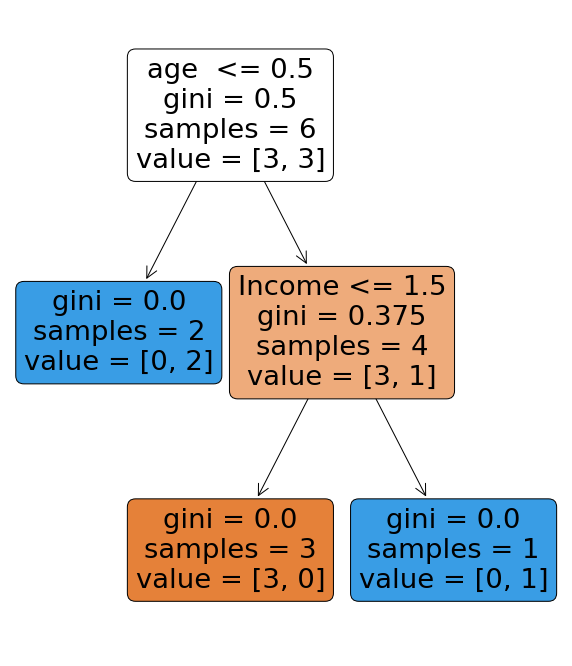

In [21]:
plt.figure(figsize=(10,12))
tree.plot_tree(dtc,filled=True,rounded=True,feature_names=x.columns)